In [96]:
from pandas import read_excel
my_sheet = 'Sheet1' #sheet name
file_name = 'Dataset.xlsx' #excel file
data = read_excel(file_name, sheet_name = my_sheet)
print(data.head()) 

   Number                                             Comment Sort A/R    Rank
0        1  Make it like better with a giant pig bigger th...    P   R  Class4
1        2  These screens are small enough without crowdin...    P   R  Class4
2        3      App crashes when new power up notice pops up.    C   A  Class1
3        4                      App crashes with new release.    C   A  Class1
4        5  Please bring back the trajectory line or at le...    P   R  Class4


In [97]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data, test_size=0.20, random_state=10)

In [98]:
train.to_excel("train.xlsx")  

In [99]:
test.to_excel("test.xlsx")

In [100]:
from pandas import read_excel
my_sheet = 'Sheet1' # sheet name
file_name_train = 'train.xlsx' # excel file
file_name_test = 'test.xlsx'
train = read_excel(file_name_train, sheet_name = my_sheet)
test = read_excel(file_name_test, sheet_name = my_sheet)

In [101]:
import nltk
from nltk.corpus import stopwords 
import string 
nltk.download('stopwords')
nltk.download('punkt')
import spacy
nlp = spacy.load('en_core_web_sm')
def text_preprocess(text):
    lm = []
    text = nlp(text)
    for token in text:
        lm.append(token.lemma_)
        
    text = " ".join(lm)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
   

    
    return " ".join(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saharalturki/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/saharalturki/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [102]:
train.columns = train.columns.str.replace(" ", "_")
test.columns = test.columns.str.replace(" ", "_")

In [103]:
train['processed'] = train['Comment'].apply(text_preprocess)
test['processed'] = test['Comment'].apply(text_preprocess)

In [104]:
train['processed'] = train.processed.str.replace(r"[0-9]","")
test['processed'] = test.processed.str.replace(r"[0-9]","")

<ipython-input-104-544e854d955a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train['processed'] = train.processed.str.replace(r"[0-9]","")
<ipython-input-104-544e854d955a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test['processed'] = test.processed.str.replace(r"[0-9]","")


In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer 
vectorizer = TfidfVectorizer("english")

/Users/saharalturki/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass input=english as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [106]:
import pandas as pd
allframes=[train['processed'], test['processed']]
alldata = pd.concat(allframes)
train.shape, test.shape, alldata.shape

((1324, 7), (332, 7), (1656,))

In [107]:
processed  = vectorizer.fit_transform(alldata)
trainprocessed=processed[0:1324]
testprocessed=processed[1324:1656]
trainprocessed.shape, testprocessed.shape, processed.shape

((1324, 3527), (332, 3527), (1656, 3527))

In [108]:
#Sort MR --------------------------------------------------------------------------------------------------

In [109]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=0)
print(model.fit(trainprocessed, train['Sort']))

DecisionTreeClassifier(random_state=0)


In [110]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
def result_acc(y_true, y_pred):
    print(f'Confusion matrix\n:{confusion_matrix(y_true, y_pred)}\n')
    print(f'Accuracy score is : {accuracy_score(y_true, y_pred)}\n')
    print('Precision: %.3f' % precision_score(y_true, y_pred, average='micro'))
    print('Recall: %.3f' % recall_score(y_true, y_pred, average='micro'))

In [111]:
y_pred = model.predict(testprocessed)

In [112]:
trainprocessed.shape

(1324, 3527)

In [113]:
print("Result for Decision Tree of Sorting MR")
result_acc(test['Sort'],y_pred )

Result for Decision Tree of Sorting MR
Confusion matrix
:[[ 42   8  18]
 [  9 136  24]
 [ 15  22  58]]

Accuracy score is : 0.7108433734939759

Precision: 0.711
Recall: 0.711


In [114]:
conf_matrix = confusion_matrix(y_true=test['Sort'], y_pred=y_pred)

In [115]:
test['Predict Sort']=y_pred

In [116]:
testresult = test.drop(columns="processed")

In [117]:
testresult.to_excel("result.xlsx")

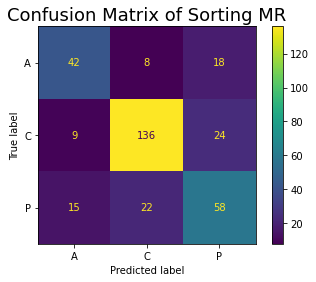

In [118]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(model, testprocessed, test['Sort'])
plt.title('Confusion Matrix of Sorting MR', fontsize=18)
plt.show()

In [119]:
# Figure of Sorting MR

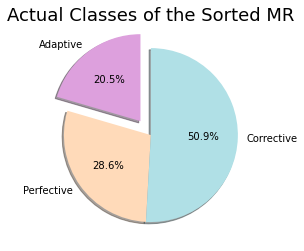

In [120]:
A=test[test['Sort'] == 'A'].shape[0]
P=test[test['Sort'] == 'P'].shape[0]
C=test[test['Sort'] == 'C'].shape[0]

import numpy as np

y = np.array([A, P, C])

mylabels = ["Adaptive", "Perfective", "Corrective"]
myexplode = [0.2, 0, 0]
colors=['plum','peachpuff','powderblue']


plt.pie(y, labels = mylabels, explode = myexplode, colors=colors, shadow = True, autopct='%1.1f%%', startangle=90)
plt.title('Actual Classes of the Sorted MR', fontsize=18)

plt.show() 

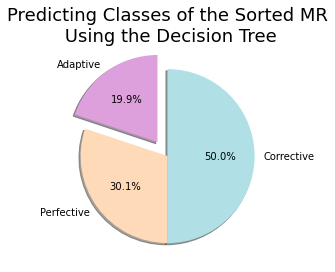

In [121]:
A=test[test['Predict Sort'] == 'A'].shape[0]
P=test[test['Predict Sort'] == 'P'].shape[0]
C=test[test['Predict Sort'] == 'C'].shape[0]

import numpy as np

y = np.array([A, P, C])

mylabels = ["Adaptive", "Perfective", "Corrective"]
myexplode = [0.2, 0, 0]
colors=['plum','peachpuff','powderblue']

plt.pie(y, labels = mylabels, explode = myexplode, colors=colors, shadow = True, autopct='%1.1f%%', startangle=90)
plt.title('Predicting Classes of the Sorted MR\n Using the Decision Tree', fontsize=18)

plt.show() 

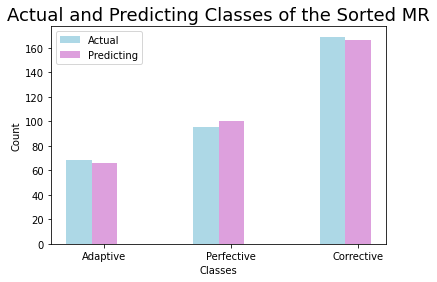

In [122]:
x = np.arange(3)

A=test[test['Sort'] == 'A'].shape[0]
P=test[test['Sort'] == 'P'].shape[0]
C=test[test['Sort'] == 'C'].shape[0]
A1=test[test['Predict Sort'] == 'A'].shape[0]
P1=test[test['Predict Sort'] == 'P'].shape[0]
C1=test[test['Predict Sort'] == 'C'].shape[0]

y = np.array([A, P, C])
y1 = np.array([A1, P1, C1])
width = 0.2
  
plt.bar(x-0.2, y, width, color='lightblue')
plt.bar(x, y1, width, color='plum')

plt.xticks(x, ["Adaptive", "Perfective", "Corrective"])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.legend(["Actual", "Predicting"])
plt.title('Actual and Predicting Classes of the Sorted MR', fontsize=18)

plt.show()

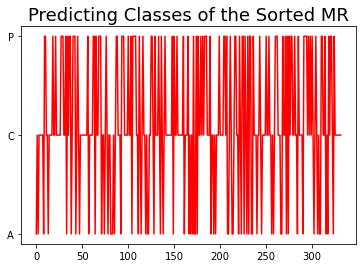

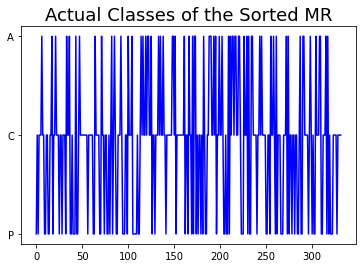

In [123]:
plt.plot(test['Predict Sort'], color = 'red', label = "Predict")
width = 0.2
plt.title('Predicting Classes of the Sorted MR', fontsize=18)
plt.show()
plt.plot(test['Sort'], color = 'blue', label = "Actual")
width = 0.2
plt.title('Actual Classes of the Sorted MR', fontsize=18)
plt.show()

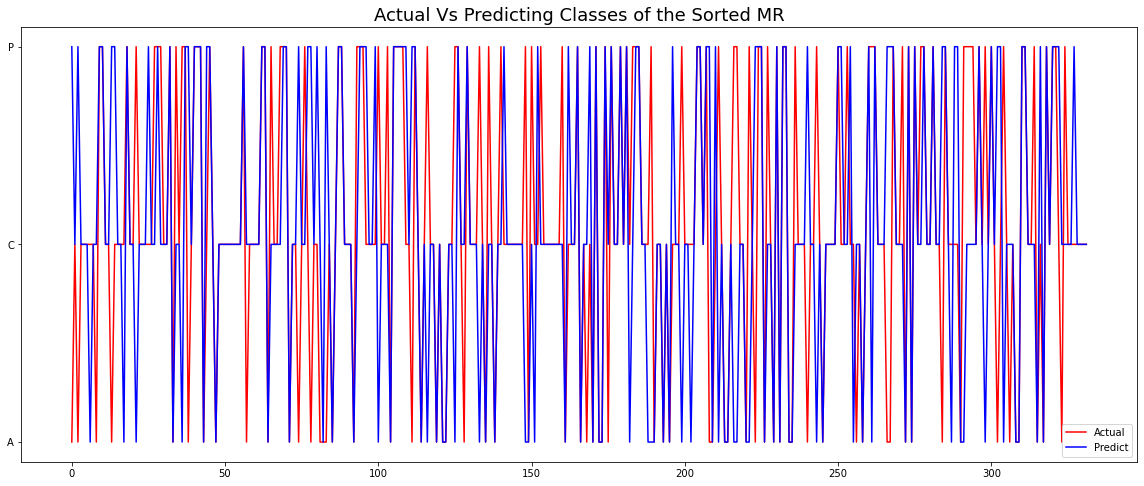

In [124]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
plt.plot(test['Predict Sort'], color = 'red', label = "Predict")
width = 0.2

plt.plot(test['Sort'], color = 'blue', label = "Actual")
plt.title('Actual Vs Predicting Classes of the Sorted MR', fontsize=18)
plt.legend(["Actual", "Predict"])

plt.show()

In [125]:
#Accept / Reject  MR -------------------------------------------------------------------------------------

In [126]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=0)
print(model.fit(trainprocessed, train['A/R']))

DecisionTreeClassifier(random_state=0)


In [127]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
def result_acc(y_true, y_pred):
    print(f'Confusion matrix\n:{confusion_matrix(y_true, y_pred)}\n')
    print(f'Accuracy score is : {accuracy_score(y_true, y_pred)}\n')
    print('Precision: %.3f' % precision_score(y_true, y_pred, average='micro'))
    print('Recall: %.3f' % recall_score(y_true, y_pred, average='micro'))

In [128]:
y_pred = model.predict(testprocessed)

In [129]:
trainprocessed.shape

(1324, 3527)

In [130]:
print("Result for Decision Tree of Accepting/Rejecting MR")
result_acc(test['A/R'],y_pred )

Result for Decision Tree of Accepting/Rejecting MR
Confusion matrix
:[[143  69]
 [ 53  67]]

Accuracy score is : 0.6325301204819277

Precision: 0.633
Recall: 0.633


In [131]:
conf_matrix = confusion_matrix(y_true=test['A/R'], y_pred=y_pred)

In [132]:
test['Predict A/R']=y_pred

In [133]:
testresult = test.drop(columns="processed")

In [134]:
testresult.to_excel("result.xlsx")

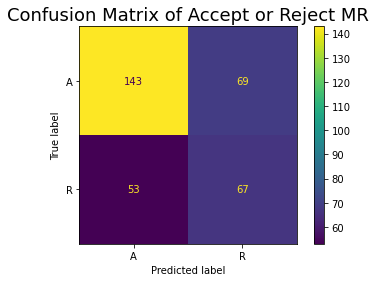

In [135]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(model, testprocessed, test['A/R'])
plt.title('Confusion Matrix of Accept or Reject MR', fontsize=18)
plt.show()

In [136]:
# Figure of Accepting/Rejecting MR

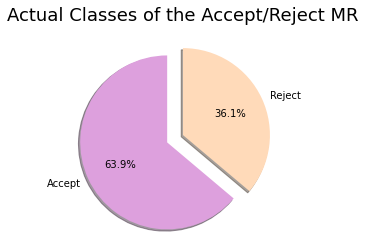

In [137]:
A=test[test['A/R'] == 'A'].shape[0]
R=test[test['A/R'] == 'R'].shape[0]

import numpy as np

y = np.array([A,R])

mylabels = ["Accept", "Reject"]
myexplode = [0.2, 0]
colors=['plum','peachpuff']

plt.pie(y, labels = mylabels, explode = myexplode, colors=colors, shadow = True, autopct='%1.1f%%', startangle=90)
plt.title('Actual Classes of the Accept/Reject MR', fontsize=18)

plt.show() 

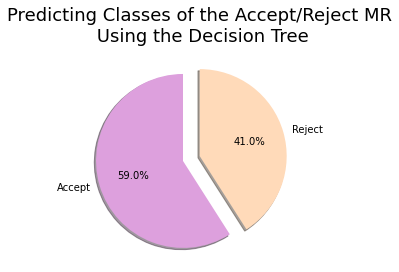

In [138]:
A=test[test['Predict A/R'] == 'A'].shape[0]
R=test[test['Predict A/R'] == 'R'].shape[0]

import numpy as np

y = np.array([A, R])

mylabels = ["Accept", "Reject"]
myexplode = [0.2, 0]
colors=['plum','peachpuff']

plt.pie(y, labels = mylabels, explode = myexplode, colors=colors, shadow = True, autopct='%1.1f%%', startangle=90)
plt.title('Predicting Classes of the Accept/Reject MR\n Using the Decision Tree', fontsize=18)

plt.show() 

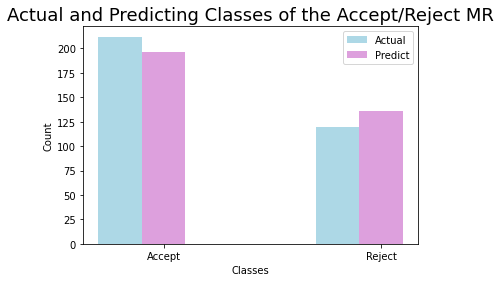

In [139]:
x = np.arange(2)

A=test[test['A/R'] == 'A'].shape[0]
R=test[test['A/R'] == 'R'].shape[0]
A1=test[test['Predict A/R'] == 'A'].shape[0]
R1=test[test['Predict A/R'] == 'R'].shape[0]

y = np.array([A, R])
y1 = np.array([A1, R1])
width = 0.2
  
plt.bar(x-0.2, y, width, color='lightblue')
plt.bar(x, y1, width, color='plum')

plt.xticks(x, ['Accept', 'Reject'])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.legend(["Actual", "Predict"])
plt.title('Actual and Predicting Classes of the Accept/Reject MR', fontsize=18)

plt.show()

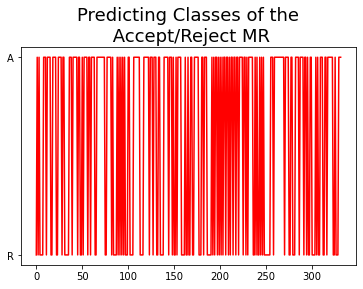

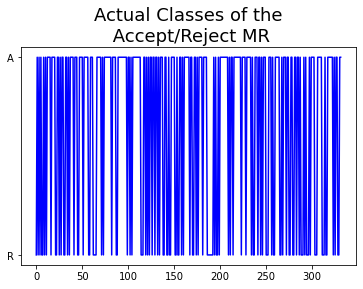

In [140]:
plt.plot(test['Predict A/R'], color = 'red', label = "Predict")
width = 0.2
plt.title('Predicting Classes of the\n Accept/Reject MR', fontsize=18)
plt.show()
plt.plot(test['A/R'], color = 'blue', label = "Actual")
width = 0.2
plt.title('Actual Classes of the\n Accept/Reject MR', fontsize=18)
plt.show()

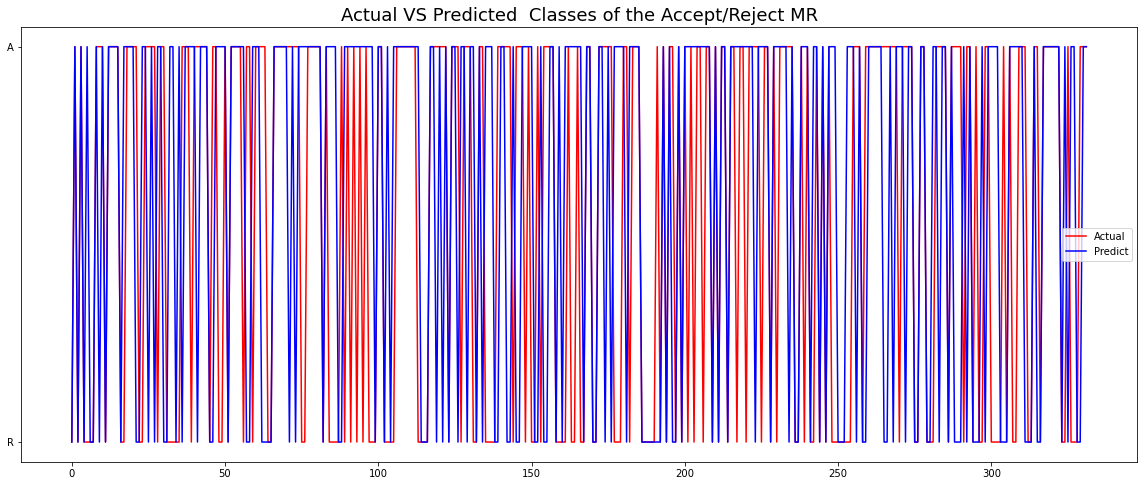

In [141]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
plt.plot(test['Predict A/R'], color = 'red', label = "Predict")
width = 0.2

plt.plot(test['A/R'], color = 'blue', label = "Actual")
plt.title('Actual VS Predicted  Classes of the Accept/Reject MR', fontsize=18)
plt.legend(["Actual", "Predict"])

plt.show()

In [142]:
#Rank MR --------------------------------------------------------------------------------------------------

In [143]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=0)
print(model.fit(trainprocessed, train['Rank']))

DecisionTreeClassifier(random_state=0)


In [144]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
def result_acc(y_true, y_pred):
    print(f'Confusion matrix\n:{confusion_matrix(y_true, y_pred)}\n')
    print(f'Accuracy score is : {accuracy_score(y_true, y_pred)}\n')
    print('Precision: %.3f' % precision_score(y_true, y_pred, average='micro'))
    print('Recall: %.3f' % recall_score(y_true, y_pred, average='micro'))

In [145]:
y_pred = model.predict(testprocessed)

In [151]:
trainprocessed.shape

(1324, 3527)

In [152]:
print("Result for Decision Tree of Ranking MR")
result_acc(test['Rank'],y_pred )

Result for Decision Tree of Ranking MR
Confusion matrix
:[[35  9  8 23]
 [12 11  9 14]
 [ 8  8 29 34]
 [13  8 20 91]]

Accuracy score is : 0.5

Precision: 0.500
Recall: 0.500


In [153]:
conf_matrix = confusion_matrix(y_true=test['Rank'], y_pred=y_pred)

In [154]:
test['predict Rank']=y_pred

In [155]:
testresult = test.drop(columns="processed")

In [156]:
testresult.to_excel("result.xlsx")

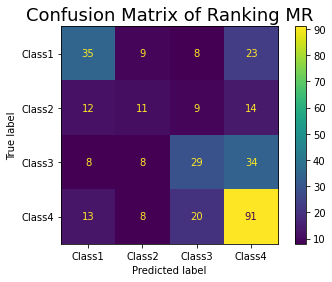

In [157]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(model, testprocessed, test['Rank'])
plt.title('Confusion Matrix of Ranking MR', fontsize=18)
plt.show()

In [158]:
# Figure of Ranking MR

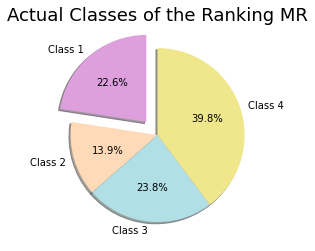

In [159]:
A=test[test['Rank'] == 'Class1'].shape[0]
B=test[test['Rank'] == 'Class2'].shape[0]
C=test[test['Rank'] == 'Class3'].shape[0]
D=test[test['Rank'] == 'Class4'].shape[0]

import numpy as np

y = np.array([A, B, C, D])

mylabels = ["Class 1", "Class 2", "Class 3", "Class 4"]
myexplode = [0.2, 0, 0, 0]
colors=['plum','peachpuff','powderblue','Khaki']


plt.pie(y, labels = mylabels, explode = myexplode, colors=colors, shadow = True, autopct='%1.1f%%', startangle=90)
plt.title('Actual Classes of the Ranking MR', fontsize=18)

plt.show() 

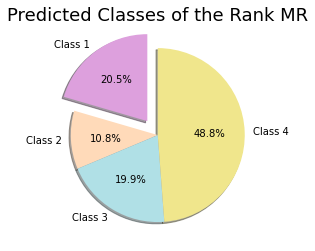

In [160]:
A1=test[test['predict Rank'] == 'Class1'].shape[0]
A2=test[test['predict Rank'] == 'Class2'].shape[0]
A3=test[test['predict Rank'] == 'Class3'].shape[0]
A4=test[test['predict Rank'] == 'Class4'].shape[0]

import numpy as np

y = np.array([A1, A2, A3, A4])

mylabels = ["Class 1", "Class 2", "Class 3", "Class 4"]
myexplode = [0.2, 0, 0, 0]
colors=['plum','peachpuff','powderblue','Khaki']

plt.pie(y, labels = mylabels, explode = myexplode, colors=colors, shadow = True, autopct='%1.1f%%', startangle=90)
plt.title('Predicted Classes of the Rank MR', fontsize=18)

plt.show() 

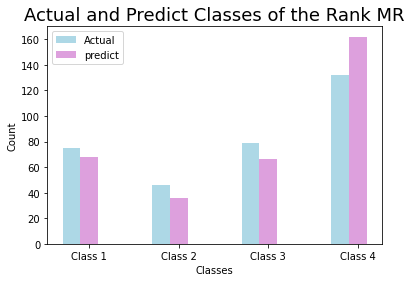

In [161]:
x = np.arange(4)

A1=test[test['Rank'] == 'Class1'].shape[0]
A2=test[test['Rank'] == 'Class2'].shape[0]
A3=test[test['Rank'] == 'Class3'].shape[0]
A4=test[test['Rank'] == 'Class4'].shape[0]
A11=test[test['predict Rank'] == 'Class1'].shape[0]
A12=test[test['predict Rank'] == 'Class2'].shape[0]
A13=test[test['predict Rank'] == 'Class3'].shape[0]
A14=test[test['predict Rank'] == 'Class4'].shape[0]

y = np.array([A1, A2, A3, A4])
y1 = np.array([A11, A12, A13, A14])
width = 0.2
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y, width, color='lightblue')
plt.bar(x, y1, width, color='plum')

plt.xticks(x, ["Class 1", "Class 2", "Class 3", "Class 4"])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.legend(["Actual", "predict"])
plt.title('Actual and Predict Classes of the Rank MR', fontsize=18)

plt.show()

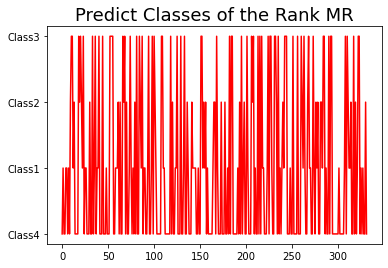

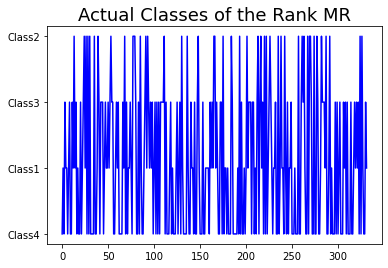

In [162]:
plt.plot(test['predict Rank'], color = 'red', label = "Predict")
width = 0.2
plt.title('Predict Classes of the Rank MR', fontsize=18)
plt.show()
plt.plot(test['Rank'], color = 'blue', label = "Actual")
width = 0.2
plt.title('Actual Classes of the Rank MR', fontsize=18)
plt.show()

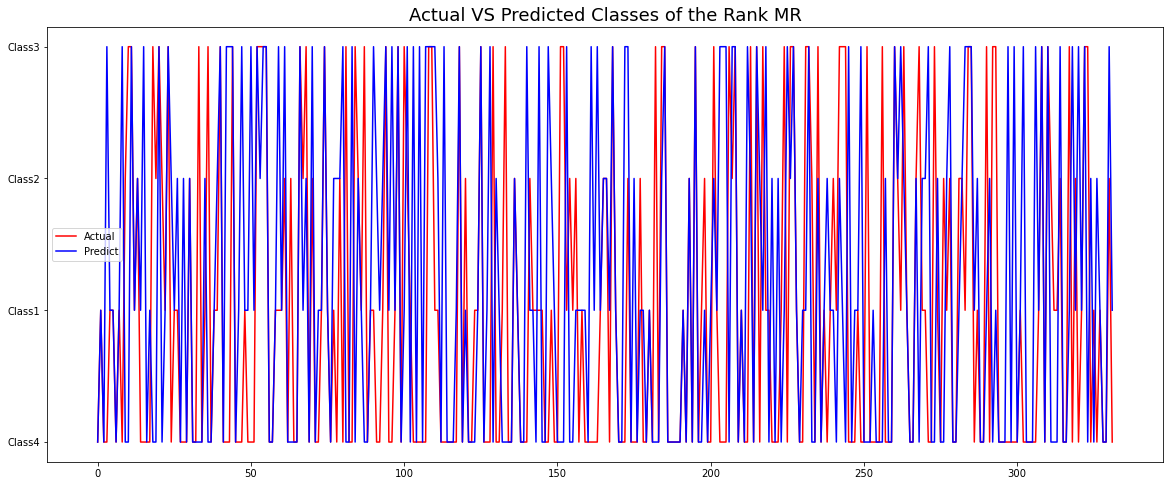

In [163]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
plt.plot(test['predict Rank'], color = 'red', label = "predict")
width = 0.2

plt.plot(test['Rank'], color = 'blue', label = "Actual")
plt.title('Actual VS Predicted Classes of the Rank MR', fontsize=18)
plt.legend(["Actual", "Predict"])

plt.show()

In [164]:
# separate Accept MR from Reject MR in Excel File

In [165]:
onlyA=test[test['Predict A/R']=='A']# only A Test
onlyA.to_excel("AcceptMR.xlsx")

In [166]:
onlyR=test[test['Predict A/R']=='R']# only R Test
onlyR.to_excel("RejectMR.xlsx")

In [93]:
#Done